<a href="https://colab.research.google.com/github/im-brahim/AdClickPrediction/blob/main/Ad_Click_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive', force_remount=True)\n"

In [ ]:
#import pandas as pd

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET/AdClickData.csv")
#df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Importing the Dataset**

In [31]:
from google.colab import files
uploaded = files.upload()

Saving AdClickData.csv to AdClickData (1).csv


# **Import data into a dataframe**

In [32]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AdClickData.csv']))
# Dataset is now stored in a Pandas Dataframe

In [33]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1.0,Norway,5/19/2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0.0,Myanmar,1/28/2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1.0,Australia,3/7/2016 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1.0,Grenada,4/18/2016 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1.0,Ghana,7/11/2016 1:42,0


In [34]:
df.shape

(1000, 10)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


# **Remove missing values.**

In [36]:
print(df.isnull().any().any())

True


In [37]:
#Count Missing Values in DataFrame
print(df.isnull().sum())
print("\nThe total summation of all missing values in the DataFrame is :", df.isnull().sum().sum())

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

The total summation of all missing values in the DataFrame is : 50


In [38]:
data = df.dropna()

In [39]:
data.isnull().any().any()

False

In [40]:
data.shape

(953, 10)

In [41]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,64.922949,36.057712,55104.204103,179.859927,0.481637,0.500525
std,15.898081,8.758299,13389.083239,43.852496,0.499925,0.500262
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,50.780000,29.000000,47160.530000,138.680000,0.000000,0.000000
50%,68.180000,35.000000,57014.840000,182.650000,0.000000,1.000000
75%,78.410000,42.000000,65620.250000,218.790000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.000000


# **Data Visualization**

<ipython-input-42-96e2d255462a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], hist=False , color='b', rug=False, fit=norm);


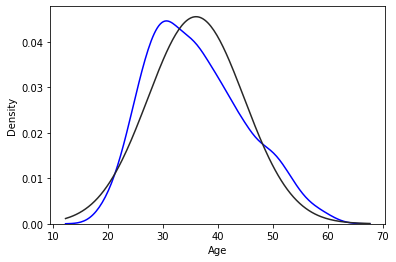

In [42]:
from scipy.stats import norm
sns.distplot(data['Age'], hist=False , color='b', rug=False, fit=norm);

<Axes: xlabel='Age', ylabel='count'>

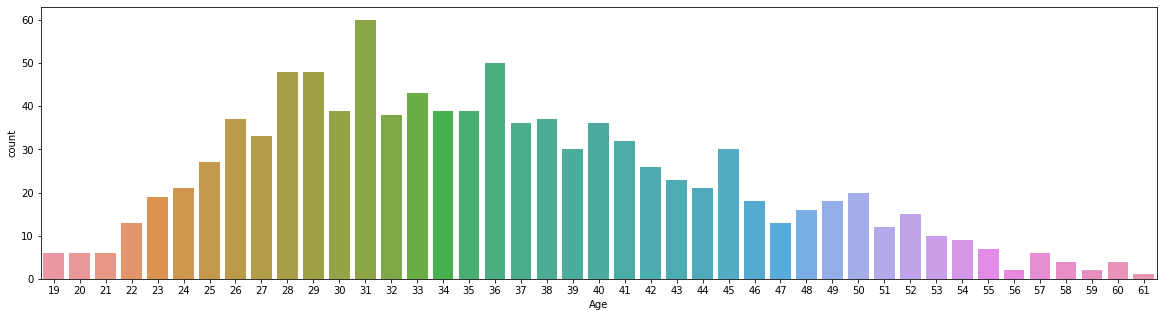

In [43]:
fig = plt.figure(figsize = (20, 5))
sns.countplot(x ='Age', data = df)

1    477
0    476
Name: Clicked on Ad, dtype: int64


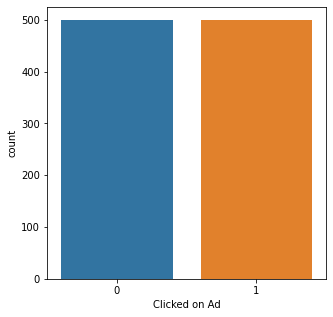

In [44]:
#get the info of the number of ad clicked
fig = plt.figure(figsize = (5, 5))
sns.countplot(x ='Clicked on Ad', data = df)
print(data['Clicked on Ad'].value_counts())

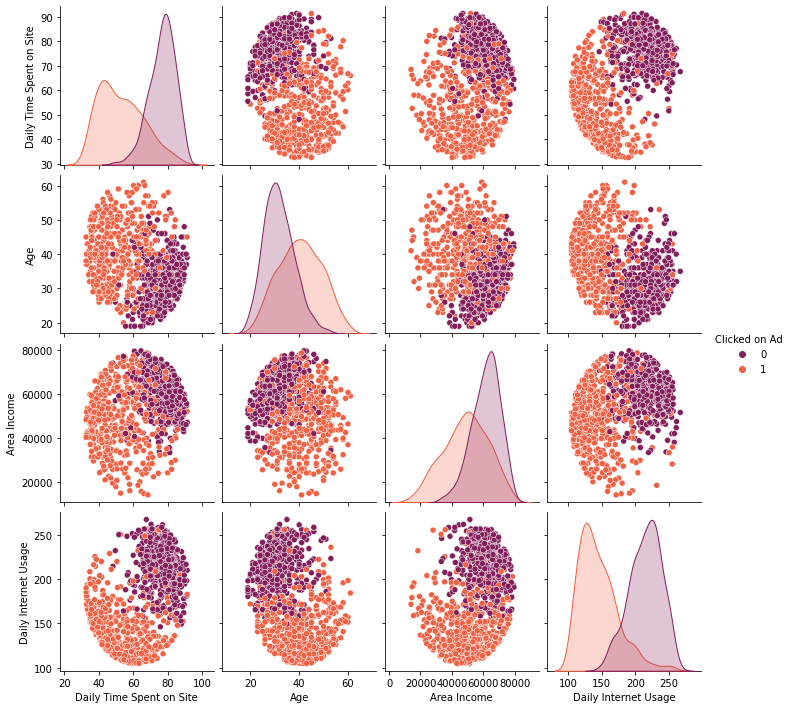

In [45]:
sns.pairplot(data, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 
                                            'Age',
                                           'Area Income',
                                           'Daily Internet Usage'], palette='rocket')

# **Data Preprocessing**

In [46]:
object_variables = ['Ad Topic Line', 'City', 'Country']
data[object_variables].describe(include=['O'])

,Ad Topic Line,City,Country
count,953,953,953
unique,953,926,235
top,Cloned 5thgeneration orchestration,Williamsport,Czech Republic
freq,1,3,9


In [47]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
Czech Republic,9
Afghanistan,8
Turkey,8
France,8
Peru,8
Australia,8
South Africa,8
Micronesia,8
Taiwan,7


In [48]:
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0.0,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,1.0,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,0.0,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,1.0,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,0.0,6/3/2016 3:36,0


In [49]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of the month'] = data['Timestamp'].dt.day
data["Day of the week"] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)
print()
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0.0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1.0,0,4,4,0,1
2,69.47,26,59785.94,236.50,0.0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1.0,0,1,10,6,2
4,68.37,35,73889.99,225.58,0.0,0,6,3,4,3


Text(0.5, 1.0, 'Clicked on Ad by Month')

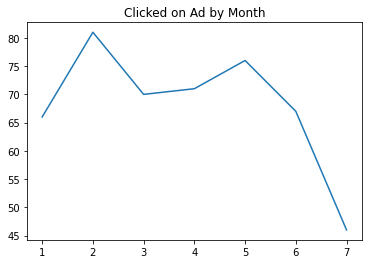

In [50]:
data['Month'][data['Clicked on Ad'] == 1].value_counts().sort_index().plot()
plt.title("Clicked on Ad by Month")

Text(0.5, 1.0, 'Clicked on Ad by day')

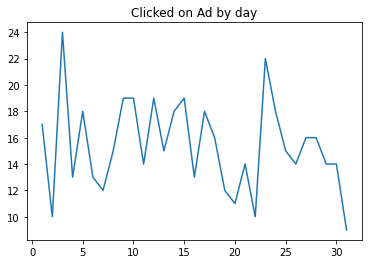

In [51]:
data['Day of the month'][data['Clicked on Ad'] == 1].value_counts().sort_index().plot()
plt.title("Clicked on Ad by day")

Text(0.5, 1.0, 'Clicked on Ad by Hour')

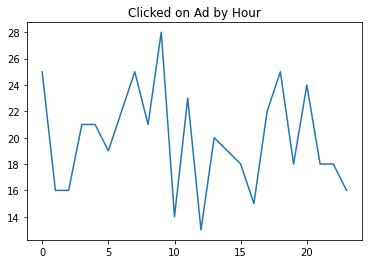

In [52]:
data['Hour'][data['Clicked on Ad'] == 1].value_counts().sort_index().plot()
plt.title("Clicked on Ad by Hour")

# **Data Splitting:**

In [53]:
from sklearn.model_selection import train_test_split

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **Model Development and Fitting Procedures**

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [55]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions_LR = LR.predict(X_test)
cf_m = confusion_matrix(y_test,predictions_LR)
print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('Confusion matrix:')
print(cf_m)


Logistic regression accuracy: 0.9111111111111111
Confusion matrix:
[[154  11]
 [ 17 133]]


<Axes: >

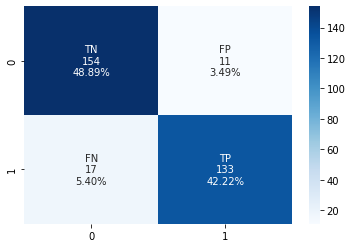

In [56]:
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_m.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_m.flatten()/np.sum(cf_m)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_m, annot=labels, fmt='', cmap='Blues')

In [57]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions_DT = DT.predict(X_test)
cf_m = confusion_matrix(y_test,predictions_DT)
print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(cf_m)

Decision tree accuracy: 0.9428571428571428

Confusion matrix:
[[152  13]
 [  5 145]]


<Axes: >

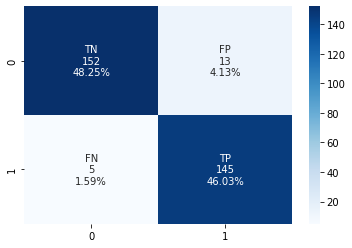

In [58]:
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_m.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_m.flatten()/np.sum(cf_m)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_m, annot=labels, fmt='', cmap='Blues')